In [1]:
import re
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import seaborn as sns

In [2]:
celltype = 'OPC_NN'

In [3]:
known_motifs = glob.glob(f"condition_dmr/{celltype}/*/knownResults.txt")

In [4]:
motif_pvalue = defaultdict(dict)

for motif_result in known_motifs:
    result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
    result_df.index = [x.split("/")[0] for x in result_df.index]

    cell_type = motif_result.split("/")[1]
    hyp = motif_result.split("/")[-2].split(".")[0]
    for motif, row in result_df.iterrows():
        if row['P-value'] < 0.01:
            motif_pvalue[motif][f'{hyp}_{cell_type}'] = row['P-value']

In [5]:
motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')
motif_pvalue_df.head()

,motif_Aging_Hypo_OPC_NN,motif_Differ_in_Aging_OPC_NN,motif_Aging_Hyper_OPC_NN
NF1-halfsite(CTF),1.000000e-25,1.000000e-14,0.000001
RORgt(NR),1.000000e-14,NaN,NaN
RORa(NR),1.000000e-12,NaN,NaN
RORg(NR),1.000000e-12,NaN,NaN
SCL(bHLH),1.000000e-10,NaN,NaN


In [6]:
dense_motif = -np.log10(motif_pvalue_df.sort_index(axis=1).sort_index()).dropna(thresh=3).fillna(0)
sparse_motif = -np.log10(motif_pvalue_df.loc[~motif_pvalue_df.index.isin(dense_motif.index)]).sort_index(axis=1).sort_index().fillna(0)
dense_motif.shape, sparse_motif.shape

((4, 3), (120, 3))

In [7]:
sparse_motif = sparse_motif.loc[sparse_motif.astype(int).sum(axis=1)>5]

In [8]:
dense_motif['Motif'] = dense_motif.index
dense_motif_melt = dense_motif.melt(var_name='Group', id_vars='Motif', value_name='-log pvalue')
dense_motif_melt['Cell'] = ['-'.join(x.split("_")[:-2]) for x in dense_motif_melt['Group']]

In [9]:
sparse_motif['Motif'] = sparse_motif.index
sparse_motif_melt = sparse_motif.melt(var_name='Group', id_vars='Motif', value_name='-log pvalue')
sparse_motif_melt['Cell'] = ['-'.join(x.split("_")[:-2]) for x in sparse_motif_melt['Group']]

In [10]:
dense_motif_melt.replace(0, np.nan, inplace=True)
sparse_motif_melt.replace(0, np.nan, inplace=True)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


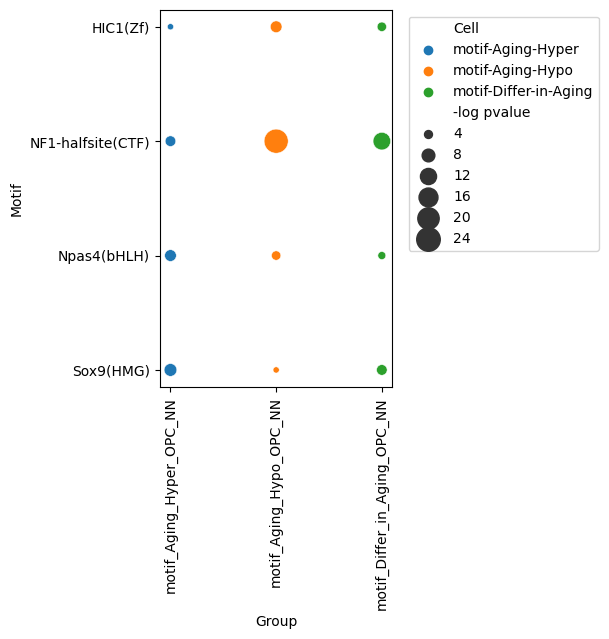

In [11]:
fig, ax = plt.subplots(1,1, figsize=(3, 5),dpi = 100, constrained_layout = True)
ax = sns.scatterplot(data=dense_motif_melt, x='Group', y='Motif', size='-log pvalue', hue='Cell', ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
#plt.savefig("dense_Motif_bubblePlot.pdf")

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


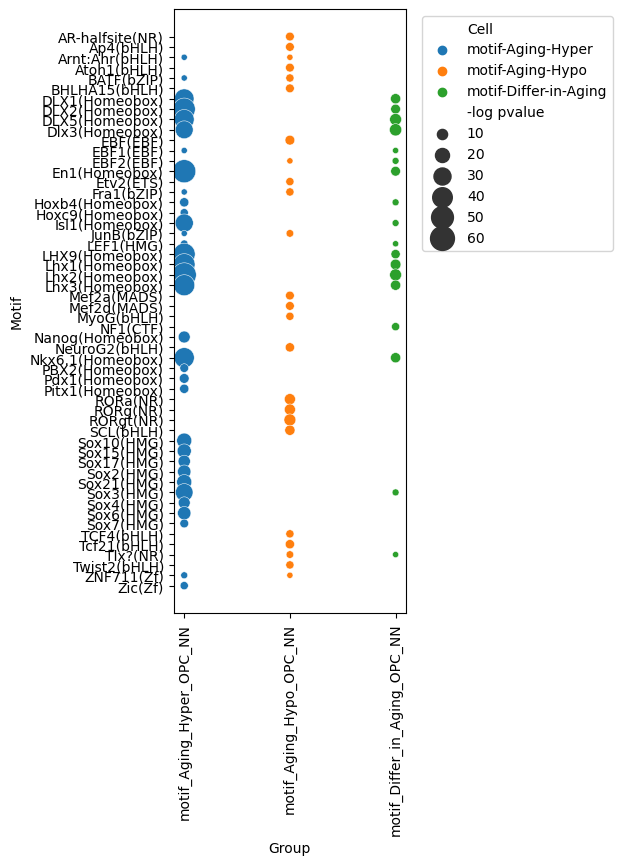

In [12]:
fig, ax = plt.subplots(1,1, figsize=(3, 8),dpi = 100, constrained_layout = True)
ax = sns.scatterplot(data=sparse_motif_melt, x='Group', y='Motif', size='-log pvalue', hue='Cell', ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
#plt.savefig("dense_Motif_bubblePlot.pdf")